In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
#pip install themis_ml
import themis_ml
from themis_ml.metrics import mean_difference

In [3]:
df = pd.read_csv("C:/Users/RASWANTH.SR/Desktop/Crime Recidivism Analysis/csv/compas-scores-two-years.csv")

In [4]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


###  Simplification with necesary columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [6]:
new_df = df[['sex', 'age', 'race', 'juv_fel_count','juv_misd_count', 'juv_other_count', 'priors_count','days_b_screening_arrest','c_charge_degree','is_recid',]]

In [7]:
new_df.head(10)

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,is_recid
0,Male,69,Other,0,0,0,0,-1.0,F,0
1,Male,34,African-American,0,0,0,0,-1.0,F,1
2,Male,24,African-American,0,0,1,4,-1.0,F,1
3,Male,23,African-American,0,1,0,1,NaN,F,0
4,Male,43,Other,0,0,0,2,NaN,F,0
5,Male,44,Other,0,0,0,0,0.0,M,0
6,Male,41,Caucasian,0,0,0,14,-1.0,F,1
7,Male,43,Other,0,0,0,3,-1.0,F,0
8,Female,39,Caucasian,0,0,0,0,-1.0,M,0
9,Male,21,Caucasian,0,0,0,1,428.0,F,1


In [8]:
new_df.shape

(7214, 10)

###  Data Preprocessing

In [9]:
df1 = new_df.dropna(axis=0)

In [10]:
df1

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,is_recid
0,Male,69,Other,0,0,0,0,-1.0,F,0
1,Male,34,African-American,0,0,0,0,-1.0,F,1
2,Male,24,African-American,0,0,1,4,-1.0,F,1
5,Male,44,Other,0,0,0,0,0.0,M,0
6,Male,41,Caucasian,0,0,0,14,-1.0,F,1
...,...,...,...,...,...,...,...,...,...,...
7209,Male,23,African-American,0,0,0,0,-1.0,F,0
7210,Male,23,African-American,0,0,0,0,-1.0,F,0
7211,Male,57,Other,0,0,0,0,-1.0,F,0
7212,Female,33,African-American,0,0,0,3,-1.0,M,0


In [11]:
df1.shape

(6907, 10)

In [12]:
df1['race'].value_counts()

African-American    3537
Caucasian           2378
Hispanic             584
Other                360
Asian                 32
Native American       16
Name: race, dtype: int64

#### Selecting African-American and Caucasian for Analysis

In [13]:
race_df = df1[(df1.race == 'African-American') | (df1.race == 'Caucasian')]
race_df

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,is_recid
1,Male,34,African-American,0,0,0,0,-1.0,F,1
2,Male,24,African-American,0,0,1,4,-1.0,F,1
6,Male,41,Caucasian,0,0,0,14,-1.0,F,1
8,Female,39,Caucasian,0,0,0,0,-1.0,M,0
9,Male,21,Caucasian,0,0,0,1,428.0,F,1
...,...,...,...,...,...,...,...,...,...,...
7207,Male,30,African-American,0,0,0,0,-1.0,M,1
7208,Male,20,African-American,0,0,0,0,-1.0,F,0
7209,Male,23,African-American,0,0,0,0,-1.0,F,0
7210,Male,23,African-American,0,0,0,0,-1.0,F,0


In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
race_df['sex'] = label_encoder.fit_transform(race_df['sex'])
race_df['race'] = label_encoder.fit_transform(race_df['race'])
race_df.head(10)

<ipython-input-14-d84e94b8bad8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['sex'] = label_encoder.fit_transform(race_df['sex'])
<ipython-input-14-d84e94b8bad8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_df['race'] = label_encoder.fit_transform(race_df['race'])


,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,is_recid
1,1,34,0,0,0,0,0,-1.0,F,1
2,1,24,0,0,0,1,4,-1.0,F,1
6,1,41,1,0,0,0,14,-1.0,F,1
8,0,39,1,0,0,0,0,-1.0,M,0
9,1,21,1,0,0,0,1,428.0,F,1
10,1,27,1,0,0,0,0,-1.0,F,0
11,1,23,0,0,0,0,3,0.0,M,1
12,0,37,1,0,0,0,0,0.0,M,0
13,1,41,0,0,0,0,0,-1.0,F,0
14,0,47,1,0,0,0,1,-20.0,F,1


In [15]:
race_df['race'].value_counts()

0    3537
1    2378
Name: race, dtype: int64

In [16]:
Y = race_df.is_recid
Y.value_counts()

1    3016
0    2899
Name: is_recid, dtype: int64

In [17]:
sex = race_df['sex']
sex.value_counts()

1    4751
0    1164
Name: sex, dtype: int64

In [18]:
race = race_df['race']
race.value_counts()

0    3537
1    2378
Name: race, dtype: int64

###  Mean Difference Calculation

In [19]:
print("Mean difference scores:")
print("protected class = sex: %0.03f, 95%% Confidence Interval [%0.03f-%0.03f]" %
      mean_difference(Y, sex))

print("protected class = race: %0.03f, 95%% Confidence Interval [%0.03f-%0.03f]" %
      mean_difference(Y, race))

Mean difference scores:
protected class = sex: -0.139, 95% Confidence Interval [-0.170--0.107]
protected class = race: 0.139, 95% Confidence Interval [0.113-0.165]


#### From the above mean difference analysis, we can infer that Men and African-American are more likely reoffended compared to women and Caussian

In [20]:
race_df.head(10)

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,is_recid
1,1,34,0,0,0,0,0,-1.0,F,1
2,1,24,0,0,0,1,4,-1.0,F,1
6,1,41,1,0,0,0,14,-1.0,F,1
8,0,39,1,0,0,0,0,-1.0,M,0
9,1,21,1,0,0,0,1,428.0,F,1
10,1,27,1,0,0,0,0,-1.0,F,0
11,1,23,0,0,0,0,3,0.0,M,1
12,0,37,1,0,0,0,0,0.0,M,0
13,1,41,0,0,0,0,0,-1.0,F,0
14,0,47,1,0,0,0,1,-20.0,F,1


In [21]:
X = pd.get_dummies(race_df,columns=['c_charge_degree'])

In [22]:
X.sample(10)

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,c_charge_degree_F,c_charge_degree_M
2084,1,22,1,0,0,2,0,-1.0,1,1,0
7031,1,26,1,0,0,0,1,-1.0,0,1,0
3081,1,21,0,1,0,1,1,-171.0,1,1,0
4897,1,26,0,0,0,0,5,-1.0,1,1,0
5622,0,42,1,0,0,0,0,-1.0,0,0,1
3606,1,30,0,0,0,0,1,-5.0,0,0,1
2440,1,23,0,0,1,0,2,-1.0,0,1,0
4658,1,23,0,0,0,0,3,0.0,0,0,1
6617,1,46,1,0,0,0,0,-1.0,1,1,0
2677,1,24,1,0,0,0,0,0.0,1,1,0


In [23]:
Y.sample(10)

7153    0
6017    1
2494    1
538     1
6346    0
5479    1
6518    1
6343    0
6537    1
4365    1
Name: is_recid, dtype: int64

### Splitting test and training set for different models

In [24]:
from sklearn.model_selection import train_test_split
train_data = X
train_data.head()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,is_recid,c_charge_degree_F,c_charge_degree_M
1,1,34,0,0,0,0,0,-1.0,1,1,0
2,1,24,0,0,0,1,4,-1.0,1,1,0
6,1,41,1,0,0,0,14,-1.0,1,1,0
8,0,39,1,0,0,0,0,-1.0,0,0,1
9,1,21,1,0,0,0,1,428.0,1,1,0


#### Feature Definition 

In [25]:
train_data.columns

Index(['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'is_recid', 'c_charge_degree_F', 'c_charge_degree_M'],
      dtype='object')

In [26]:
features = ['sex', 'age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'is_recid', 'c_charge_degree_F', 'c_charge_degree_M']

features_without_sex = ['age', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'is_recid', 'c_charge_degree_F', 'c_charge_degree_M']

features_without_race = ['sex', 'age', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'is_recid', 'c_charge_degree_F', 'c_charge_degree_M']

In [27]:
X = train_data[features].values
X_without_sex = train_data[features_without_sex].values
X_without_race = train_data[features_without_race].values
y = Y.values
s_sex = sex.values
s_race = race.values

### Training using Different Models with five-cross validation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.base import clone

from themis_ml.postprocessing.reject_option_classification import SingleROClassifier
from themis_ml.linear_model import LinearACFClassifier

In [42]:
column_metrics  = ["mean_diff_sex", "mean_diff_race", "auc_sex", "auc_race"]

def run_train_iteration(X, X_no_sex, X_no_race, y, s_sex, s_race, train, test):
    
    metrics = []
    # List of is lists which contains fairness and utility metrics related to sex and race
    
    # Model Definition
    
    logistic_clf = LogisticRegression(penalty="l2", C=0.001, class_weight="balanced",solver='lbfgs', max_iter=1000)
    baseline_clf = logistic_clf
    rpa_clf = logistic_clf
    roc_clf = SingleROClassifier(estimator=logistic_clf)
    acf_clf = LinearACFClassifier(
        target_estimator=logistic_clf,
        binary_residual_type="absolute")

    # Training LR model
    baseline_clf.fit(X[train], y[train])
    baseline_preds = baseline_clf.predict(X[test])
    baseline_auc = roc_auc_score(y[test], baseline_preds)
    metrics.append([
        "LR",
        mean_difference(baseline_preds, s_sex[test])[0],
        mean_difference(baseline_preds, s_race[test])[0],
        baseline_auc, baseline_auc 
    ])
    # Training Remove Protocted Attributes Model
    # Explicit training of wiithout sex and race attributes
    
    rpa_preds_without_sex = rpa_clf.fit(
        X_without_sex[train], y[train]).predict(X_no_sex[test])
    rpa_preds_without_race = rpa_clf.fit(
        X_without_race[train], y[train]).predict(X_no_race[test])
    metrics.append([
        "RPA",
        mean_difference(rpa_preds_without_sex, s_sex[test])[0],
        mean_difference(rpa_preds_without_race, s_race[test])[0],
        roc_auc_score(y[test], rpa_preds_without_sex),
        roc_auc_score(y[test], rpa_preds_without_race),
    ])
    
    # Training Reject option Classification Model
    
    roc_clf.fit(X[train],y[train])
    roc_preds_sex = roc_clf.predict(X[test], s_sex[test])  
    roc_preds_race = roc_clf.predict(X[test],s_race[test])
    metrics.append([
        "ROC",
        mean_difference(roc_preds_sex, s_sex[test])[0],
        mean_difference(roc_preds_race,s_race[test])[0],
        roc_auc_score(y[test], roc_preds_sex),
        roc_auc_score(y[test], roc_preds_race),
    ])
    
    # Training Additive Counterfactually fair model
    acf_preds_sex = acf_clf.fit(
        X[train], y[train], s_sex[train]).predict(X[test], s_sex[test])
    acf_preds_race = acf_clf.fit(
        X[train], y[train], s_race[train]).predict(X[test], s_race[test])
    metrics.append([
        "ACF",
        mean_difference(acf_preds_sex, s_sex[test])[0],
        mean_difference(acf_preds_race, s_race[test])[0],
        roc_auc_score(y[test], acf_preds_sex),
        roc_auc_score(y[test], acf_preds_race),
    ])
    
    return pd.DataFrame(metrics, columns=["Models"]+column_metrics)

Cross Validation on train


,mean(mean_diff_sex),mean(mean_diff_race),mean(auc_sex),mean(auc_race)
Models,,,,
LR,0.175902,0.229166,0.886770,0.886770
RPA,0.165760,0.223282,0.886984,0.886466
ROC,0.176068,0.228546,0.752007,0.752007
ACF,0.071559,0.060142,0.883801,0.877135


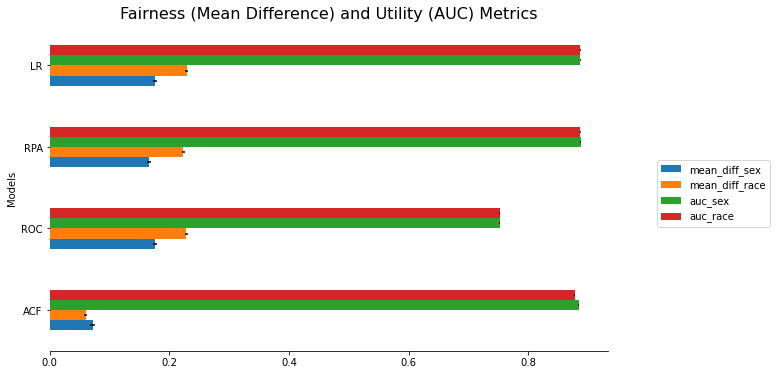

In [44]:
N_SPLITS = 5
N_REPEATS = 20

groups = np.add(s_sex,s_race)

# Performing 5-fold, 10x repetition (Cross validation) in order to reduce uncertaininty around metric estimation
cv = RepeatedStratifiedKFold(n_splits = N_SPLITS, n_repeats = N_REPEATS, random_state=41)

metrics = []

print("Cross Validation on train")
for i, (train_idx, test_idx) in enumerate(cv.split(X, y, groups=groups)):
    metrics.append(
        run_train_iteration(X, X_without_sex, X_without_race, y, s_sex, s_race, train_idx, test_idx).assign(rep_fold=i))

metrics = pd.concat(metrics)

grp_df = metrics.groupby('Models')
# Mean metrics
mean_metrics = (grp_df[column_metrics].mean().abs())
# Standard Error
std_err_metrics = (grp_df[column_metrics].std())/np.sqrt(N_REPEATS*N_SPLITS)

# Visulaization using bar plot

ax = mean_metrics.loc[reversed(["LR", "RPA", "ROC", "ACF"])].plot(
    kind="barh", figsize=(10, 6),
    xerr=std_err_metrics.loc[reversed(["LR", "RPA", "ROC", "ACF"])],
    legend=False);
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 0.6))
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', left='off')
ax.set_title(
    "Fairness (Mean Difference) and Utility (AUC) Metrics", fontsize=16);

mean_metrics.loc[["LR", "RPA", "ROC", "ACF"]].rename(
    columns=lambda x: "mean(%s)" % x)

#### Cross Validation

In [45]:
mean_metrics.loc[["LR", "RPA", "ROC", "ACF"]].rename(
    columns=lambda x: "mean(%s)" % x)

,mean(mean_diff_sex),mean(mean_diff_race),mean(auc_sex),mean(auc_race)
Models,,,,
LR,0.175902,0.229166,0.886770,0.886770
RPA,0.165760,0.223282,0.886984,0.886466
ROC,0.176068,0.228546,0.752007,0.752007
ACF,0.071559,0.060142,0.883801,0.877135


### Observations:

#####  For the bias to be treated, we are trying to make a trade-off between Fairness and utility 

Acccording to our approach the ***mean difference*** should be low and ***accuracy*** should be high.
From the above horizontal bar plot we can infer that for both LR and RPA classification models, both accuracy and mean difference are high.
And with respect to ACF & ROC, the mean difference is low but it tends to lower the accuracy along with it.

To conclude, **ACF** would be **good classifier** to the above problem as mean differnce is signigficantly lower, but in terms of accuracy **logistic regression** would be a **suitable classifier**.